# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [4]:
# Importar bibliotecas padrão (nenhuma neste caso)

# Importar bibliotecas de terceiros
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importar pacotes específicos de bibliotecas ou funções
from seaborn import load_dataset
import statsmodels.formula.api as smf

In [67]:
#Carregar base de dados 'tips' do Seaborn
tips = sns.load_dataset('tips')

#Criar coluna de 'Gorjeta Percentual'
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

#Criar coluna de 'Gorjeta Líquida'
tips['net_bill'] = tips['total_bill'] - tips['tip']

tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [69]:
#Criar objeto para armazenar resultados do modelo
reg_tip = smf.ols('tip ~ net_bill', data=tips).fit()

#Visualizar detalhes do modelo
reg_tip.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Wed, 11 Sep 2024   Prob (F-statistic):           5.02e-23
Time:                        15:40:34   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
#Prever novos dados
dados_novos = tips[0:5]
reg_tip.predict(dados_novos)

0    2.918050
1    2.192915
2    3.070031
3    3.354125
4    3.414719
dtype: float64

(0.0, 10.45)

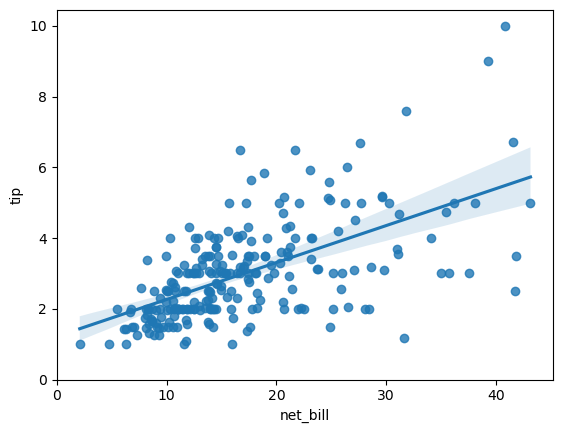

In [12]:
#Gráfico de dispersão 'tip' e 'net_bill'

#Plotar gráfico de dispersão
sns.regplot(y='tip', x='net_bill', data=tips[tips['tip_pct']<.5])

#Definir ponto (0, 0)
plt.xlim(left=0)
plt.ylim(bottom=0)

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [73]:
#Criar objeto para armazenar resultados do modelo
reg_pct = smf.ols('tip_pct ~ net_bill', data=tips).fit()

#Visualizar detalhes do modelo
reg_pct.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Wed, 11 Sep 2024   Prob (F-statistic):           1.52e-06
Time:                        15:40:47   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
#Prever novos dados
d_n = tips[0:5]
reg_pct.predict(d_n)

0    0.207087
1    0.251951
2    0.197684
3    0.180107
4    0.176358
dtype: float64

(0.0, 0.505398619388979)

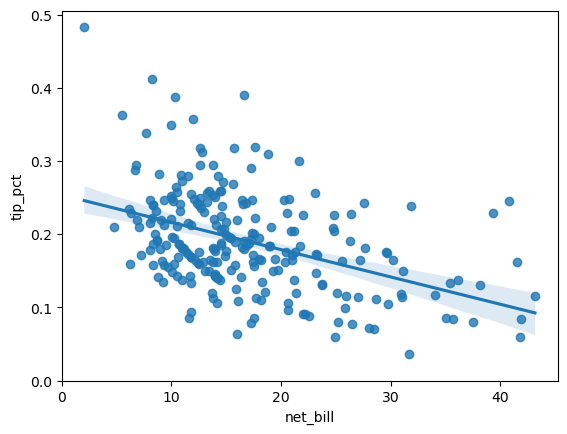

In [77]:
#Gráfico de dispersão 'tip_pct' e 'net_bill'

#Plotar gráfico de dispersão
sns.regplot(y='tip_pct', x='net_bill', data=tips[tips['tip_pct']<.5])

#Definir ponto (0, 0)
plt.xlim(left=0)
plt.ylim(bottom=0)

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

No gráfico de dispersão 'tip' e 'net_bill', a linha de regressão mostra uma tendência positiva, ou seja, à medida que a conta líquida aumenta, o valor absoluto da gorjeta também tende a aumentar. No entanto, para contas mais altas, a variabilidade do valor absoluto da gorjeta (representado pela maior dispersão dos pontos) também aumenta, o que sugere uma maior incerteza sobre quanto de gorjeta é dado conforme o valor da conta aumenta. No gráfico de dispersão 'tip_pct' e 'net_bill', a linha de regressão mostra uma tendência negativa, indicando que, conforme o valor líquido da conta aumenta, o valor percentual da gorjeta tende a diminuir. Isso sugere que, embora as gorjetas em valor absoluto aumentem com a conta (como mostrado no primeiro gráfico),o valor percentual da gorjeta dada tende a ser menor à medida que o valor da conta cresce. Para contas mais baixas (abaixo de $10), a dispersão dos percentuais de gorjeta é maior, com algumas gorjetas representando até 50% da conta. Isso indica que, para valores de conta mais baixos, as pessoas podem dar o valores percentuais da gorjeta significativamente mais altos como gorjeta.

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [79]:
#Obter previsões (1)
tips['tip_pct_pred'] = reg_pct.fittedvalues
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill,tip_pct_pred
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98,0.207087
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68,0.251951
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51,0.197684
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37,0.180107
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98,0.176358


In [81]:
#Obter valores tip_pct * net_bill (2)
tips['tip_cal'] = tips['tip_pct_pred']*tips['net_bill']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill,tip_pct_pred,tip_cal
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98,0.207087,3.309254
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68,0.251951,2.186938
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51,0.197684,3.461450
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37,0.180107,3.668785
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98,0.176358,3.699998


In [83]:
#Calcular R-Quadrado para o Modelo 'tip_pct' e 'net_bill' (3)
rs_reg_pct = reg_pct.rsquared
rs_reg_pct

0.09129084920662978

In [85]:
#Calcular R-Quadrado para o Modelo 'tip' e 'net_bill'
rs_reg_tip = reg_tip.rsquared
rs_reg_tip

0.3325407312323705

O Modelo 1 (tip ~ net_bill) está melhor ajustado do que o Modelo 2 (tip_pct ~ net_bill), conforme indicado pelo R² mais alto (0.3325 vs. 0.0913). Indicando que, embora o valor absoluto da gorjeta (tip) tenha uma relação moderada com o valor da conta (net_bill), o percentual da gorjeta (tip_pct) não varia de forma tão previsível em relação ao valor da conta. Portanto, o Modelo 1 seria mais eficaz para prever o valor absoluto da gorjeta. 